# Draw maps with Python

## Install required libraries


In [26]:
%pip install matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


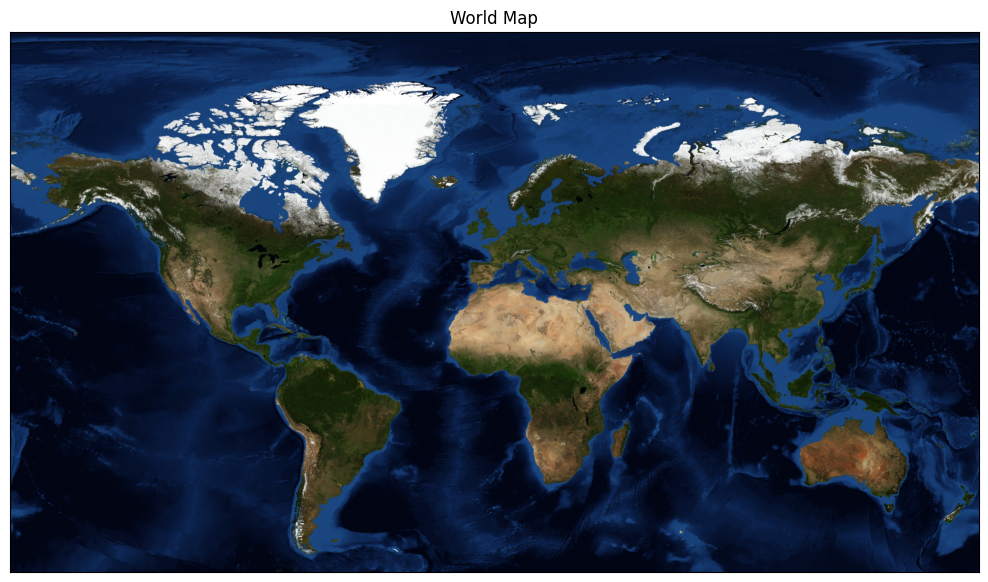

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l')

# Desired dimensions in pixels
width_px = 1200
height_px = 800

# Convert pixels to inches (1 inch = 96 pixels)
width_in = width_px / 96
height_in = height_px / 96

# Set the figure size (width, height) in inches
plt.figure(figsize=(width_in, height_in))

# Draw map features
#m.drawcoastlines()
#m.drawcountries()
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='coral', lake_color='aqua')

# Draw the map
m.bluemarble()

# Display the map
plt.title("World Map")
plt.show()